### Basic imports

In [23]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report

### Accessing data

In [2]:
df = pd.read_csv('Epileptic Seizure Recognition.csv')

In [3]:
df.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


In [5]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


#target label

y contains the category of the 178-dimensional input vector. Specifically y in {1, 2, 3, 4, 5}:

5 - eyes open, means when they were recording the EEG signal of the brain the patient had their eyes open

4 - eyes closed, means when they were recording the EEG signal the patient had their eyes closed

3 - Yes they identify where the region of the tumor was in the brain and recording the EEG activity from the healthy brain area

2 - They recorder the EEG from the area where the tumor was located

1 - Recording of seizure activity

basically 1->seizure activity rest->non-seizure activities

In [7]:
#converting into binary problem
bin_map = {1:1,2:0,3:0,4:0,5:0}
df['y'] = df['y'].replace(bin_map)
df['y'].value_counts()

y
0    9200
1    2300
Name: count, dtype: int64

<Axes: xlabel='y', ylabel='count'>

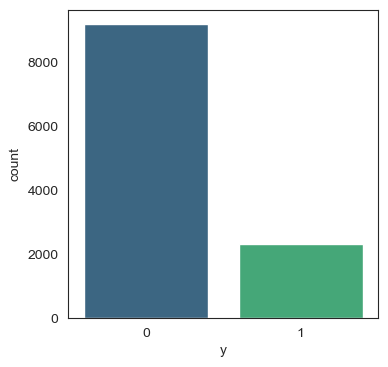

In [8]:
#after mapping
plt.figure(figsize=(4,4))
sns.countplot(x='y',data=df,palette='viridis')

In [9]:
#checking for missing data
df.isnull().sum().sort_values(ascending=False)
#no missing data in this case

Unnamed    0
X113       0
X115       0
X116       0
X117       0
          ..
X61        0
X62        0
X63        0
X64        0
y          0
Length: 180, dtype: int64

In [10]:
#duplicates
df.drop_duplicates(inplace=True)

In [11]:
df.drop('Unnamed',axis=1,inplace=True)

### Splitting data

In [14]:
X = df.drop('y',axis=1)
y = df['y']

### Oversampling data

In [17]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
rand = RandomOverSampler()
print("Before:", Counter(y))
X_rand, y_rand = rand.fit_resample(X, y)
print("After:", Counter(y_rand))

Before: Counter({0: 9200, 1: 2300})
After: Counter({0: 9200, 1: 9200})


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [20]:
#oversampled data
X_train_rand,X_test_rand,y_train_rand,y_test_rand = train_test_split(X_rand,y_rand,test_size=0.3)

### Scaling Data

In [21]:
from sklearn.preprocessing import StandardScaler
st_sclr = StandardScaler()
X_train = st_sclr.fit_transform(X_train)
X_test = st_sclr.transform(X_test)

In [22]:
X_train_rand = st_sclr.fit_transform(X_train_rand)
X_test_rand = st_sclr.transform(X_test_rand)

# Base Models - Dtree,RFC,SVM,Logistic

## Decision Tree

In [24]:
#for orignal data
from sklearn.tree import DecisionTreeClassifier
dtree_1 = DecisionTreeClassifier()
dtree_1.fit(X_train,y_train)
pred_dtree_1 = dtree_1.predict(X_test)
print("Decision Tree with Orignal Data: ")
print(classification_report(y_test,pred_dtree_1))

Decision Tree with Orignal Data: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2756
           1       0.87      0.82      0.84       694

    accuracy                           0.94      3450
   macro avg       0.91      0.89      0.90      3450
weighted avg       0.94      0.94      0.94      3450



In [25]:
#oversampled data
dtree_2 = DecisionTreeClassifier()
dtree_2.fit(X_train_rand,y_train_rand)
pred_dtree_2 = dtree_2.predict(X_test_rand)
print("Decision Tree with Oversampled Data: ")
print(classification_report(y_test_rand,pred_dtree_2))

Decision Tree with Oversampled Data: 
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2782
           1       0.95      0.99      0.97      2738

    accuracy                           0.97      5520
   macro avg       0.97      0.97      0.97      5520
weighted avg       0.97      0.97      0.97      5520



#### Decision Tree with oversampled data performs better on identifying both classes

## Random Forest

In [26]:
#rfc with orignal data
from sklearn.ensemble import RandomForestClassifier
rfc_1 = RandomForestClassifier()
rfc_1.fit(X_train,y_train)
pred_rfc_1 = rfc_1.predict(X_test)
print("Random Forest with orignal data: ")
print(classification_report(y_test,pred_rfc_1))

Random Forest with orignal data: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2756
           1       0.95      0.92      0.94       694

    accuracy                           0.97      3450
   macro avg       0.97      0.95      0.96      3450
weighted avg       0.97      0.97      0.97      3450



In [29]:
#rfc with oversampled data
rfc_2 = RandomForestClassifier()
rfc_2.fit(X_train_rand,y_train_rand)
pred_rfc_2 = rfc_2.predict(X_test_rand)
print("Random Forest with oversampled data: ")
print(classification_report(y_test_rand,pred_rfc_2))

Random Forest with oversampled data: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2782
           1       0.98      1.00      0.99      2738

    accuracy                           0.99      5520
   macro avg       0.99      0.99      0.99      5520
weighted avg       0.99      0.99      0.99      5520



#### RFC achieved 99% accuracy with oversampled data

## SVM

In [30]:
#orignal data
from sklearn.svm import SVC
svm_1 = SVC()
svm_1.fit(X_train,y_train)
pred_svm_1 = svm_1.predict(X_test)
print("SVM with orignal data: ")
print(classification_report(y_test,pred_svm_1))

SVM with orignal data: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2756
           1       0.96      0.88      0.92       694

    accuracy                           0.97      3450
   macro avg       0.96      0.93      0.95      3450
weighted avg       0.97      0.97      0.97      3450



In [31]:
#oversampled data
svm_2 = SVC()
svm_2.fit(X_train_rand,y_train_rand)
pred_svm_2 = svm_2.predict(X_test_rand)
print("SVM with oversampled data: ")
print(classification_report(y_test_rand,pred_svm_2))

SVM with oversampled data: 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2782
           1       0.98      0.97      0.98      2738

    accuracy                           0.98      5520
   macro avg       0.98      0.98      0.98      5520
weighted avg       0.98      0.98      0.98      5520



### Logistic Regression

In [33]:
#orignal data
from sklearn.linear_model import LogisticRegression
lg_mdoel_1 = LogisticRegression()
lg_mdoel_1.fit(X_train,y_train)
pred_lg_1 = lg_mdoel_1.predict(X_test)
print("Logistic Regression with orignal data: ")
print(classification_report(y_test,pred_lg_1))

Logistic Regression with orignal data: 
              precision    recall  f1-score   support

           0       0.81      1.00      0.90      2756
           1       1.00      0.10      0.18       694

    accuracy                           0.82      3450
   macro avg       0.91      0.55      0.54      3450
weighted avg       0.85      0.82      0.75      3450



In [35]:
#oversampled data
lg_mdoel_2 = LogisticRegression()
lg_mdoel_2.fit(X_train_rand,y_train_rand)
pred_lg_2 = lg_mdoel_2.predict(X_test_rand)
print("Logistic Regression with oversampled data: ")
print(classification_report(y_test_rand,pred_lg_2))

Logistic Regression with oversampled data: 
              precision    recall  f1-score   support

           0       0.61      0.77      0.68      2782
           1       0.69      0.50      0.58      2738

    accuracy                           0.64      5520
   macro avg       0.65      0.64      0.63      5520
weighted avg       0.65      0.64      0.63      5520



## Gradient boost models

### Catboost (99% accuracy for oversampled data)

In [36]:
from catboost import CatBoostClassifier

In [38]:
#baseline model with orignal data
cat_clf_1 = CatBoostClassifier()
cat_clf_1.fit(X_train,y_train,logging_level='Verbose',plot=True)
pred_cat_1 = cat_clf_1.predict(X_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.025102
0:	learn: 0.6617994	total: 65.2ms	remaining: 1m 5s
1:	learn: 0.6327614	total: 70.4ms	remaining: 35.1s
2:	learn: 0.6056209	total: 75.9ms	remaining: 25.2s
3:	learn: 0.5802592	total: 81ms	remaining: 20.2s
4:	learn: 0.5556051	total: 86ms	remaining: 17.1s
5:	learn: 0.5340805	total: 91ms	remaining: 15.1s
6:	learn: 0.5123033	total: 96.1ms	remaining: 13.6s
7:	learn: 0.4929175	total: 102ms	remaining: 12.6s
8:	learn: 0.4735789	total: 106ms	remaining: 11.7s
9:	learn: 0.4560475	total: 112ms	remaining: 11.1s
10:	learn: 0.4380658	total: 117ms	remaining: 10.5s
11:	learn: 0.4221125	total: 122ms	remaining: 10.1s
12:	learn: 0.4074183	total: 127ms	remaining: 9.66s
13:	learn: 0.3939128	total: 133ms	remaining: 9.36s
14:	learn: 0.3802737	total: 138ms	remaining: 9.07s
15:	learn: 0.3674848	total: 145ms	remaining: 8.9s
16:	learn: 0.3556023	total: 150ms	remaining: 8.69s
17:	learn: 0.3438811	total: 156ms	remaining: 8.49s
18:	learn: 0.3327011	total: 162ms	remaining: 8.35s
19:	learn: 

191:	learn: 0.0610975	total: 1s	remaining: 4.21s
192:	learn: 0.0608528	total: 1s	remaining: 4.2s
193:	learn: 0.0606055	total: 1.01s	remaining: 4.2s
194:	learn: 0.0603531	total: 1.01s	remaining: 4.19s
195:	learn: 0.0601140	total: 1.02s	remaining: 4.19s
196:	learn: 0.0598330	total: 1.03s	remaining: 4.18s
197:	learn: 0.0595705	total: 1.03s	remaining: 4.18s
198:	learn: 0.0593519	total: 1.04s	remaining: 4.18s
199:	learn: 0.0590741	total: 1.04s	remaining: 4.17s
200:	learn: 0.0588481	total: 1.05s	remaining: 4.17s
201:	learn: 0.0585882	total: 1.05s	remaining: 4.16s
202:	learn: 0.0582875	total: 1.06s	remaining: 4.16s
203:	learn: 0.0579944	total: 1.06s	remaining: 4.15s
204:	learn: 0.0577365	total: 1.07s	remaining: 4.15s
205:	learn: 0.0574647	total: 1.08s	remaining: 4.15s
206:	learn: 0.0571977	total: 1.08s	remaining: 4.15s
207:	learn: 0.0569774	total: 1.09s	remaining: 4.14s
208:	learn: 0.0566910	total: 1.09s	remaining: 4.13s
209:	learn: 0.0565218	total: 1.1s	remaining: 4.13s
210:	learn: 0.0562933

386:	learn: 0.0296842	total: 2s	remaining: 3.17s
387:	learn: 0.0295876	total: 2s	remaining: 3.16s
388:	learn: 0.0294827	total: 2.01s	remaining: 3.16s
389:	learn: 0.0293908	total: 2.02s	remaining: 3.15s
390:	learn: 0.0293060	total: 2.02s	remaining: 3.15s
391:	learn: 0.0292190	total: 2.03s	remaining: 3.14s
392:	learn: 0.0291267	total: 2.03s	remaining: 3.14s
393:	learn: 0.0290028	total: 2.04s	remaining: 3.13s
394:	learn: 0.0289199	total: 2.04s	remaining: 3.13s
395:	learn: 0.0288282	total: 2.05s	remaining: 3.12s
396:	learn: 0.0287256	total: 2.05s	remaining: 3.12s
397:	learn: 0.0286337	total: 2.06s	remaining: 3.11s
398:	learn: 0.0285643	total: 2.06s	remaining: 3.11s
399:	learn: 0.0284907	total: 2.07s	remaining: 3.1s
400:	learn: 0.0283767	total: 2.07s	remaining: 3.1s
401:	learn: 0.0282881	total: 2.08s	remaining: 3.09s
402:	learn: 0.0281951	total: 2.08s	remaining: 3.09s
403:	learn: 0.0281088	total: 2.09s	remaining: 3.08s
404:	learn: 0.0279951	total: 2.09s	remaining: 3.08s
405:	learn: 0.027895

546:	learn: 0.0181801	total: 2.81s	remaining: 2.32s
547:	learn: 0.0181275	total: 2.81s	remaining: 2.32s
548:	learn: 0.0180802	total: 2.81s	remaining: 2.31s
549:	learn: 0.0180095	total: 2.82s	remaining: 2.31s
550:	learn: 0.0179818	total: 2.83s	remaining: 2.3s
551:	learn: 0.0179569	total: 2.83s	remaining: 2.3s
552:	learn: 0.0179019	total: 2.83s	remaining: 2.29s
553:	learn: 0.0178508	total: 2.84s	remaining: 2.29s
554:	learn: 0.0178011	total: 2.85s	remaining: 2.28s
555:	learn: 0.0177576	total: 2.85s	remaining: 2.27s
556:	learn: 0.0177280	total: 2.85s	remaining: 2.27s
557:	learn: 0.0176847	total: 2.86s	remaining: 2.27s
558:	learn: 0.0176303	total: 2.86s	remaining: 2.26s
559:	learn: 0.0175873	total: 2.87s	remaining: 2.25s
560:	learn: 0.0175378	total: 2.87s	remaining: 2.25s
561:	learn: 0.0175004	total: 2.88s	remaining: 2.24s
562:	learn: 0.0174395	total: 2.88s	remaining: 2.24s
563:	learn: 0.0174138	total: 2.89s	remaining: 2.23s
564:	learn: 0.0173464	total: 2.89s	remaining: 2.23s
565:	learn: 0.

713:	learn: 0.0117259	total: 3.62s	remaining: 1.45s
714:	learn: 0.0117046	total: 3.62s	remaining: 1.44s
715:	learn: 0.0116750	total: 3.63s	remaining: 1.44s
716:	learn: 0.0116571	total: 3.63s	remaining: 1.43s
717:	learn: 0.0116364	total: 3.64s	remaining: 1.43s
718:	learn: 0.0116186	total: 3.64s	remaining: 1.42s
719:	learn: 0.0115947	total: 3.65s	remaining: 1.42s
720:	learn: 0.0115797	total: 3.65s	remaining: 1.41s
721:	learn: 0.0115538	total: 3.65s	remaining: 1.41s
722:	learn: 0.0115172	total: 3.66s	remaining: 1.4s
723:	learn: 0.0114799	total: 3.67s	remaining: 1.4s
724:	learn: 0.0114643	total: 3.67s	remaining: 1.39s
725:	learn: 0.0114311	total: 3.67s	remaining: 1.39s
726:	learn: 0.0114016	total: 3.68s	remaining: 1.38s
727:	learn: 0.0113637	total: 3.69s	remaining: 1.38s
728:	learn: 0.0113404	total: 3.69s	remaining: 1.37s
729:	learn: 0.0113196	total: 3.69s	remaining: 1.37s
730:	learn: 0.0112927	total: 3.7s	remaining: 1.36s
731:	learn: 0.0112638	total: 3.7s	remaining: 1.36s
732:	learn: 0.01

876:	learn: 0.0079977	total: 4.43s	remaining: 621ms
877:	learn: 0.0079821	total: 4.43s	remaining: 616ms
878:	learn: 0.0079682	total: 4.44s	remaining: 611ms
879:	learn: 0.0079489	total: 4.45s	remaining: 606ms
880:	learn: 0.0079313	total: 4.45s	remaining: 601ms
881:	learn: 0.0079109	total: 4.46s	remaining: 597ms
882:	learn: 0.0078891	total: 4.46s	remaining: 591ms
883:	learn: 0.0078699	total: 4.47s	remaining: 586ms
884:	learn: 0.0078520	total: 4.47s	remaining: 581ms
885:	learn: 0.0078360	total: 4.48s	remaining: 576ms
886:	learn: 0.0078214	total: 4.48s	remaining: 571ms
887:	learn: 0.0077999	total: 4.49s	remaining: 566ms
888:	learn: 0.0077796	total: 4.49s	remaining: 561ms
889:	learn: 0.0077488	total: 4.5s	remaining: 556ms
890:	learn: 0.0077311	total: 4.5s	remaining: 551ms
891:	learn: 0.0077141	total: 4.51s	remaining: 546ms
892:	learn: 0.0076997	total: 4.51s	remaining: 541ms
893:	learn: 0.0076777	total: 4.52s	remaining: 536ms
894:	learn: 0.0076662	total: 4.52s	remaining: 531ms
895:	learn: 0.

In [39]:
print("Catboost with orignal data: ")
print(classification_report(y_test,pred_cat_1))

Catboost with orignal data: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2756
           1       0.97      0.89      0.93       694

    accuracy                           0.97      3450
   macro avg       0.97      0.94      0.96      3450
weighted avg       0.97      0.97      0.97      3450



In [40]:
#baseline model with oversampled data
cat_clf_2 = CatBoostClassifier()
cat_clf_2.fit(X_train_rand,y_train_rand,logging_level='Verbose',plot=True)
pred_cat_2 = cat_clf_2.predict(X_test_rand)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.030681
0:	learn: 0.6597213	total: 11.2ms	remaining: 11.2s
1:	learn: 0.6319874	total: 19.6ms	remaining: 9.78s
2:	learn: 0.6059994	total: 27ms	remaining: 8.99s
3:	learn: 0.5816213	total: 33.5ms	remaining: 8.34s
4:	learn: 0.5587936	total: 39.7ms	remaining: 7.91s
5:	learn: 0.5353485	total: 45.4ms	remaining: 7.52s
6:	learn: 0.5163471	total: 51.7ms	remaining: 7.34s
7:	learn: 0.4975354	total: 57.5ms	remaining: 7.13s
8:	learn: 0.4800770	total: 63.2ms	remaining: 6.96s
9:	learn: 0.4630815	total: 68.7ms	remaining: 6.8s
10:	learn: 0.4471137	total: 74.4ms	remaining: 6.68s
11:	learn: 0.4313316	total: 80ms	remaining: 6.59s
12:	learn: 0.4164888	total: 85.7ms	remaining: 6.51s
13:	learn: 0.4030595	total: 91.5ms	remaining: 6.44s
14:	learn: 0.3899189	total: 97.2ms	remaining: 6.38s
15:	learn: 0.3771287	total: 103ms	remaining: 6.32s
16:	learn: 0.3657560	total: 108ms	remaining: 6.26s
17:	learn: 0.3550071	total: 114ms	remaining: 6.21s
18:	learn: 0.3447372	total: 119ms	remaining: 6.17s
1

172:	learn: 0.0779735	total: 1.01s	remaining: 4.82s
173:	learn: 0.0774986	total: 1.01s	remaining: 4.82s
174:	learn: 0.0770269	total: 1.02s	remaining: 4.82s
175:	learn: 0.0767698	total: 1.03s	remaining: 4.81s
176:	learn: 0.0763275	total: 1.03s	remaining: 4.81s
177:	learn: 0.0760990	total: 1.04s	remaining: 4.8s
178:	learn: 0.0757559	total: 1.05s	remaining: 4.8s
179:	learn: 0.0753622	total: 1.05s	remaining: 4.79s
180:	learn: 0.0749893	total: 1.06s	remaining: 4.79s
181:	learn: 0.0746216	total: 1.06s	remaining: 4.79s
182:	learn: 0.0741526	total: 1.07s	remaining: 4.79s
183:	learn: 0.0736871	total: 1.08s	remaining: 4.79s
184:	learn: 0.0733427	total: 1.09s	remaining: 4.79s
185:	learn: 0.0730041	total: 1.09s	remaining: 4.79s
186:	learn: 0.0726187	total: 1.1s	remaining: 4.78s
187:	learn: 0.0721904	total: 1.11s	remaining: 4.78s
188:	learn: 0.0718880	total: 1.11s	remaining: 4.77s
189:	learn: 0.0715139	total: 1.12s	remaining: 4.77s
190:	learn: 0.0711416	total: 1.12s	remaining: 4.76s
191:	learn: 0.0

343:	learn: 0.0381084	total: 2.02s	remaining: 3.85s
344:	learn: 0.0379899	total: 2.02s	remaining: 3.85s
345:	learn: 0.0378807	total: 2.03s	remaining: 3.84s
346:	learn: 0.0377425	total: 2.04s	remaining: 3.83s
347:	learn: 0.0376360	total: 2.04s	remaining: 3.83s
348:	learn: 0.0375028	total: 2.05s	remaining: 3.82s
349:	learn: 0.0373689	total: 2.05s	remaining: 3.81s
350:	learn: 0.0371733	total: 2.06s	remaining: 3.81s
351:	learn: 0.0370433	total: 2.06s	remaining: 3.8s
352:	learn: 0.0369375	total: 2.07s	remaining: 3.8s
353:	learn: 0.0367604	total: 2.08s	remaining: 3.79s
354:	learn: 0.0366669	total: 2.08s	remaining: 3.78s
355:	learn: 0.0365106	total: 2.09s	remaining: 3.78s
356:	learn: 0.0364204	total: 2.09s	remaining: 3.77s
357:	learn: 0.0362764	total: 2.1s	remaining: 3.77s
358:	learn: 0.0362022	total: 2.1s	remaining: 3.76s
359:	learn: 0.0360210	total: 2.11s	remaining: 3.75s
360:	learn: 0.0358712	total: 2.12s	remaining: 3.75s
361:	learn: 0.0357125	total: 2.12s	remaining: 3.74s
362:	learn: 0.03

511:	learn: 0.0212785	total: 3.03s	remaining: 2.89s
512:	learn: 0.0211890	total: 3.04s	remaining: 2.88s
513:	learn: 0.0211051	total: 3.04s	remaining: 2.88s
514:	learn: 0.0210419	total: 3.05s	remaining: 2.87s
515:	learn: 0.0209775	total: 3.06s	remaining: 2.87s
516:	learn: 0.0209254	total: 3.06s	remaining: 2.86s
517:	learn: 0.0208357	total: 3.07s	remaining: 2.86s
518:	learn: 0.0207738	total: 3.08s	remaining: 2.85s
519:	learn: 0.0206881	total: 3.08s	remaining: 2.84s
520:	learn: 0.0206213	total: 3.09s	remaining: 2.84s
521:	learn: 0.0205581	total: 3.1s	remaining: 2.83s
522:	learn: 0.0205078	total: 3.12s	remaining: 2.84s
523:	learn: 0.0204631	total: 3.13s	remaining: 2.85s
524:	learn: 0.0204151	total: 3.15s	remaining: 2.85s
525:	learn: 0.0203331	total: 3.16s	remaining: 2.85s
526:	learn: 0.0202694	total: 3.17s	remaining: 2.84s
527:	learn: 0.0202108	total: 3.17s	remaining: 2.84s
528:	learn: 0.0201347	total: 3.18s	remaining: 2.83s
529:	learn: 0.0200663	total: 3.19s	remaining: 2.83s
530:	learn: 0

671:	learn: 0.0130640	total: 4.04s	remaining: 1.97s
672:	learn: 0.0130221	total: 4.05s	remaining: 1.97s
673:	learn: 0.0129739	total: 4.05s	remaining: 1.96s
674:	learn: 0.0129438	total: 4.06s	remaining: 1.96s
675:	learn: 0.0129067	total: 4.07s	remaining: 1.95s
676:	learn: 0.0128599	total: 4.07s	remaining: 1.94s
677:	learn: 0.0128400	total: 4.08s	remaining: 1.94s
678:	learn: 0.0128152	total: 4.08s	remaining: 1.93s
679:	learn: 0.0127644	total: 4.09s	remaining: 1.93s
680:	learn: 0.0127559	total: 4.1s	remaining: 1.92s
681:	learn: 0.0127032	total: 4.1s	remaining: 1.91s
682:	learn: 0.0126716	total: 4.11s	remaining: 1.91s
683:	learn: 0.0126296	total: 4.12s	remaining: 1.9s
684:	learn: 0.0126015	total: 4.12s	remaining: 1.9s
685:	learn: 0.0125582	total: 4.13s	remaining: 1.89s
686:	learn: 0.0125140	total: 4.13s	remaining: 1.88s
687:	learn: 0.0124908	total: 4.14s	remaining: 1.88s
688:	learn: 0.0124516	total: 4.14s	remaining: 1.87s
689:	learn: 0.0124158	total: 4.15s	remaining: 1.86s
690:	learn: 0.01

838:	learn: 0.0082133	total: 5.06s	remaining: 970ms
839:	learn: 0.0081821	total: 5.06s	remaining: 964ms
840:	learn: 0.0081669	total: 5.07s	remaining: 958ms
841:	learn: 0.0081488	total: 5.08s	remaining: 952ms
842:	learn: 0.0081268	total: 5.08s	remaining: 947ms
843:	learn: 0.0081026	total: 5.09s	remaining: 940ms
844:	learn: 0.0080819	total: 5.09s	remaining: 934ms
845:	learn: 0.0080600	total: 5.1s	remaining: 928ms
846:	learn: 0.0080326	total: 5.11s	remaining: 922ms
847:	learn: 0.0080015	total: 5.11s	remaining: 916ms
848:	learn: 0.0079756	total: 5.12s	remaining: 910ms
849:	learn: 0.0079610	total: 5.13s	remaining: 904ms
850:	learn: 0.0079477	total: 5.13s	remaining: 898ms
851:	learn: 0.0079343	total: 5.14s	remaining: 892ms
852:	learn: 0.0079167	total: 5.14s	remaining: 886ms
853:	learn: 0.0078898	total: 5.15s	remaining: 880ms
854:	learn: 0.0078587	total: 5.16s	remaining: 874ms
855:	learn: 0.0078419	total: 5.16s	remaining: 868ms
856:	learn: 0.0078217	total: 5.17s	remaining: 862ms
857:	learn: 0

In [42]:
print("Catboost with oversampled data: ")
print(classification_report(y_test_rand,pred_cat_2))
# 99% accuracy with oversampled data

Catboost with oversampled data: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2782
           1       0.99      1.00      0.99      2738

    accuracy                           0.99      5520
   macro avg       0.99      0.99      0.99      5520
weighted avg       0.99      0.99      0.99      5520



### XGBOOST (99% accuracy for  oversampled data)

In [43]:
#baseline xgb with orignal data
from xgboost import XGBClassifier
xgb_clf_1 = XGBClassifier()
xgb_clf_1.fit(X_train,y_train)
pred_xgb_1 = xgb_clf_1.predict(X_test)
print("XGBoost with orignal data: ")
print(classification_report(y_test,pred_xgb_1))

XGBoost with orignal data: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2756
           1       0.97      0.89      0.93       694

    accuracy                           0.97      3450
   macro avg       0.97      0.94      0.96      3450
weighted avg       0.97      0.97      0.97      3450



In [44]:
#xgb wuth oversampled data
xgb_clf_2 = XGBClassifier()
xgb_clf_2.fit(X_train_rand,y_train_rand)
pred_xgb_2 = xgb_clf_2.predict(X_test_rand)
print("XGBoost with oversampled data: ")
print(classification_report(y_test_rand,pred_xgb_2))

XGBoost with oversampled data: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2782
           1       0.99      1.00      0.99      2738

    accuracy                           0.99      5520
   macro avg       0.99      0.99      0.99      5520
weighted avg       0.99      0.99      0.99      5520



### LGBM (99% accuracy with oversampled data)

In [46]:
#lgbm with orignal data
from lightgbm import LGBMClassifier
lgbm_1 = LGBMClassifier()
lgbm_1.fit(X_train,y_train)
pred_lgbm_1 = lgbm_1.predict(X_test)
print("LightGBM with orignal data: ")
print(classification_report(y_test,pred_lgbm_1))

[LightGBM] [Info] Number of positive: 1606, number of negative: 6444
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002870 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 45390
[LightGBM] [Info] Number of data points in the train set: 8050, number of used features: 178
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.199503 -> initscore=-1.389403
[LightGBM] [Info] Start training from score -1.389403
LightGBM with orignal data: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2756
           1       0.97      0.90      0.93       694

    accuracy                           0.97      3450
   macro avg       0.97      0.94      0.96      3450
weighted avg       0.97      0.97      0.97      3450



In [47]:
#lgbm with oversampled data
lgbm_2 = LGBMClassifier()
lgbm_2.fit(X_train_rand,y_train_rand)
pred_lgbm_2 = lgbm_2.predict(X_test_rand)
print("LightGBM with oversampled data: ")
print(classification_report(y_test_rand,pred_lgbm_2))

[LightGBM] [Info] Number of positive: 6462, number of negative: 6418
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002698 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 45390
[LightGBM] [Info] Number of data points in the train set: 12880, number of used features: 178
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501708 -> initscore=0.006832
[LightGBM] [Info] Start training from score 0.006832
LightGBM with oversampled data: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2782
           1       0.98      1.00      0.99      2738

    accuracy                           0.99      5520
   macro avg       0.99      0.99      0.99      5520
weighted avg       0.99      0.99      0.99      5520





# Deep Learning Models

### ANN

In [51]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2)
X_train_rand,X_val_rand,y_train_rand,y_val_rand = train_test_split(X_train_rand,y_train_rand,test_size=0.2)

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [50]:
X_train.shape

(8050, 178)

In [56]:
def create_model():
    #define model
    model = Sequential()
    #layer 1 ->178
    model.add(Dense(178,activation='relu'))
    model.add(Dropout(0.2))
    #layer 2 ->89
    model.add(Dense(89,activation='relu'))
    model.add(Dropout(0.2))
    #layer 3 ->44
    model.add(Dense(44,activation='relu'))
    model.add(Dropout(0.2))
    #layer 4 ->22
    model.add(Dense(22,activation='relu'))
    model.add(Dropout(0.2))
    #layer 5 -> 11
    model.add(Dense(11,activation='relu'))
    model.add(Dropout(0.2))
    #layer 6 -> 6
    model.add(Dense(6,activation='relu'))
    #layer 7 ->3
    model.add(Dense(3,activation='relu'))
    #ouptut layer
    model.add(Dense(1,activation='sigmoid'))
    
    #compile model
    model.compile(loss='binary_crossentropy',optimizer = 'adam',metrics=['accuracy'])
    
    return model

In [71]:
#ANN with orignal data
from tensorflow.keras.backend import clear_session
clear_session()
ANN_1 = create_model()

In [72]:
history_1 = ANN_1.fit(X_train,y_train,
         validation_data=(X_val,y_val),
         epochs=50,batch_size=128)

Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.8024 - loss: 0.6962 - val_accuracy: 0.7870 - val_loss: 0.5227
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8050 - loss: 0.4879 - val_accuracy: 0.7870 - val_loss: 0.2738
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8063 - loss: 0.2871 - val_accuracy: 0.7870 - val_loss: 0.2175
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8068 - loss: 0.2149 - val_accuracy: 0.7870 - val_loss: 0.2163
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8029 - loss: 0.2017 - val_accuracy: 0.7870 - val_loss: 0.1985
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8722 - loss: 0.1835 - val_accuracy: 0.9714 - val_loss: 0.1954
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9632 - loss: 0.1721 - val_accuracy: 0.9714 - val_loss: 0.1897
Epoch 8/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.9630 - loss: 0.1640 - val_accuracy: 0.9727 - v

<Axes: >

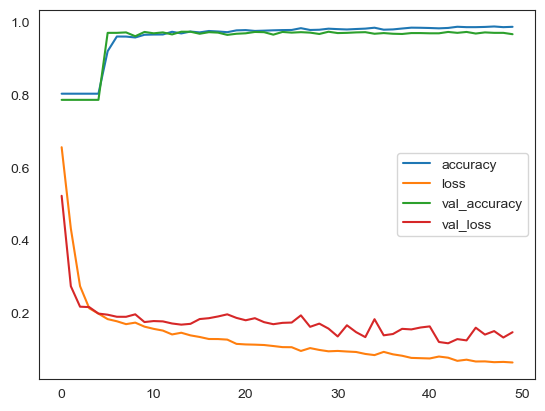

In [76]:
loss_df_1 = pd.DataFrame(history_1.history)
loss_df_1.plot()

In [61]:
pred_ANN_1 = ANN_1.predict(X_test)
pred_ANN_1 = (pred_ANN_1 > 0.5).astype(int)
print(classification_report(y_test,pred_ANN_1))

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2756
           1       0.97      0.92      0.94       694

    accuracy                           0.98      3450
   macro avg       0.97      0.96      0.96      3450
weighted avg       0.98      0.98      0.98      3450



In [77]:
#ANN with oversampled data
ANN_2 = create_model()

In [78]:
history_2 = ANN_2.fit(X_train_rand,y_train_rand,
         validation_data=(X_val_rand,y_val_rand),
         epochs=75,batch_size=128)

Epoch 1/75
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - accuracy: 0.6309 - loss: 0.6866 - val_accuracy: 0.9196 - val_loss: 0.5300
Epoch 2/75
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.9169 - loss: 0.4833 - val_accuracy: 0.9674 - val_loss: 0.3566
Epoch 3/75
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.9622 - loss: 0.3611 - val_accuracy: 0.9713 - val_loss: 0.3300
Epoch 4/75
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.9608 - loss: 0.3348 - val_accuracy: 0.9573 - val_loss: 0.3170
Epoch 5/75
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.9626 - loss: 0.3118 - val_accuracy: 0.9724 - val_loss: 0.2871
Epoch 6/75
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.9733 - loss: 0.2818 - val_accuracy: 0.9732 - val_loss: 0.2795
Epoch 7/75
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.9761 - loss: 0.2655 - val_accuracy: 0.9705 - val_loss: 0.2627
Epoch 8/75
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.9731 - loss: 0.2560 - val_accuracy: 0.9697 - v

81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.9912 - loss: 0.0560 - val_accuracy: 0.9829 - val_loss: 0.0910
Epoch 52/75
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.9890 - loss: 0.0615 - val_accuracy: 0.9825 - val_loss: 0.0973
Epoch 53/75
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.9923 - loss: 0.0519 - val_accuracy: 0.9818 - val_loss: 0.0940
Epoch 54/75
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.9926 - loss: 0.0501 - val_accuracy: 0.9821 - val_loss: 0.0925
Epoch 55/75
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.9912 - loss: 0.0519 - val_accuracy: 0.9790 - val_loss: 0.0997
Epoch 56/75
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.9913 - loss: 0.0522 - val_accuracy: 0.9806 - val_loss: 0.1014
Epoch 57/75
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.9928 - loss: 0.0463 - val_accuracy: 0.9806 - val_loss: 0.0919
Epoch 58/75
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.9897 - loss: 0.0541 - val_accuracy: 0.9783 - val_l

<Axes: >

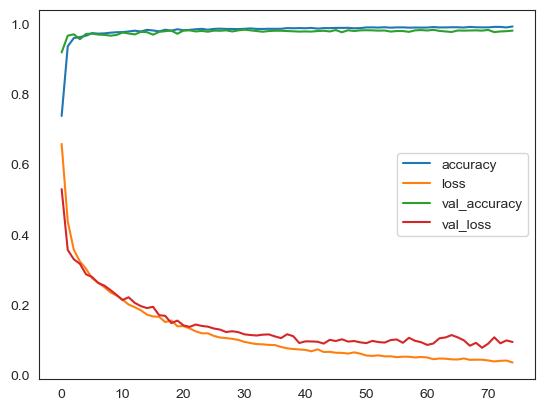

In [79]:
loss_df_2 = pd.DataFrame(history_2.history)
loss_df_2.plot()

In [65]:
pred_ANN_2 = ANN_2.predict(X_test_rand)
pred_ANN_2 = (pred_ANN_2 > 0.5).astype(int)
print(classification_report(y_test_rand,pred_ANN_2))

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2782
           1       0.98      1.00      0.99      2738

    accuracy                           0.99      5520
   macro avg       0.99      0.99      0.99      5520
weighted avg       0.99      0.99      0.99      5520



## LSTM

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM,Input

In [92]:
def create_LSTM():
    #define model
    model = Sequential()
    #Input Layer
    model.add(Input(shape=(X_train.shape[1],1)))
    #LSTM 1
    model.add(LSTM(units=128,return_sequences=True))
    #LSTM 2
    model.add(LSTM(units=128))
    #Dense layer 1
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.2))
    #Dense layer 2
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #layer 3
    model.add(Dense(32,activation='relu'))
    model.add(Dropout(0.2))
    #layer 4
    model.add(Dense(16,activation='relu'))
    model.add(Dropout(0.2))
    #layer 5
    model.add(Dense(8,activation='relu'))
    model.add(Dropout(0.2))
    #layer 6
    model.add(Dense(4,activation='relu'))
    #layer 7
    model.add(Dense(2,activation='relu'))
    #output layer
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    
    model.summary()
    return model
    

In [96]:
LSTM_1 = create_LSTM()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                  │ (None, 178, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,705 (881.66 KB)

 Trainable params: 225,705 (881.66 KB)

 Non-trainable params: 0 (0.00 B)

In [97]:
lstm_history_1 = LSTM_1.fit(X_train,y_train,
          validation_data=(X_val,y_val),
          epochs=50,batch_size=128)

Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - accuracy: 0.8271 - loss: 0.6631 - val_accuracy: 0.9404 - val_loss: 0.5752
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.9521 - loss: 0.5843 - val_accuracy: 0.9571 - val_loss: 0.5522
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.9463 - loss: 0.5628 - val_accuracy: 0.8739 - val_loss: 0.6054
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.8841 - loss: 0.6190 - val_accuracy: 0.7863 - val_loss: 0.6410
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.8449 - loss: 0.6180 - val_accuracy: 0.8969 - val_loss: 0.5756
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.9188 - loss: 0.5611 - val_accuracy: 0.8640 - val_loss: 0.5673
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.8872 - loss: 0.5589 - val_accuracy: 0.8789 - val_loss: 0.5388
Epoch 8/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.9283 - loss: 0.5073 - val_accuracy: 0.9435 - v

<Axes: >

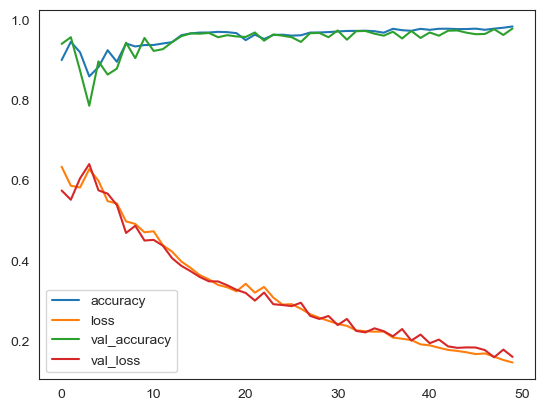

In [100]:
loss_df_lstm_1 = pd.DataFrame(lstm_history_1.history)
loss_df_lstm_1.plot()

In [101]:
pred_lstm_1 = (LSTM_1.predict(X_test)>0.5).astype(int)
print(classification_report(y_test,pred_lstm_1))

108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2756
           1       0.98      0.95      0.96       694

    accuracy                           0.98      3450
   macro avg       0.98      0.97      0.98      3450
weighted avg       0.98      0.98      0.98      3450



In [99]:
#with oversampled data
LSTM_2 = create_LSTM()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 178, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,705 (881.66 KB)

 Trainable params: 225,705 (881.66 KB)

 Non-trainable params: 0 (0.00 B)

In [106]:
lstm_history_2 = LSTM_2.fit(X_train_rand,y_train_rand,
          validation_data=(X_val_rand,y_val_rand),
          epochs=25,batch_size=128)

Epoch 1/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - accuracy: 0.9736 - loss: 0.0738 - val_accuracy: 0.9655 - val_loss: 0.0996
Epoch 2/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - accuracy: 0.9670 - loss: 0.0847 - val_accuracy: 0.9755 - val_loss: 0.0719
Epoch 3/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 103ms/step - accuracy: 0.9643 - loss: 0.0964 - val_accuracy: 0.9732 - val_loss: 0.0677
Epoch 4/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - accuracy: 0.9749 - loss: 0.0681 - val_accuracy: 0.9755 - val_loss: 0.0663
Epoch 5/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - accuracy: 0.9728 - loss: 0.0724 - val_accuracy: 0.9546 - val_loss: 0.1215
Epoch 6/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - accuracy: 0.9639 - loss: 0.1004 - val_accuracy: 0.9736 - val_loss: 0.0688
Epoch 7/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - accuracy: 0.9706 - loss: 0.0792 - val_accuracy: 0.9763 - val_loss: 0.0738
Epoch 8/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.9735 - loss: 0.0822 - val_accuracy: 0.9705 - 

In [107]:
pred_lstm_2 = (LSTM_2.predict(X_test_rand)>0.5).astype(int)
print(classification_report(y_test_rand,pred_lstm_2))

173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2782
           1       0.96      0.99      0.98      2738

    accuracy                           0.98      5520
   macro avg       0.98      0.98      0.98      5520
weighted avg       0.98      0.98      0.98      5520



### BILSTM

In [108]:
from tensorflow.keras.layers import Bidirectional

In [109]:
def create_BILSTM():
    #define model
    model = Sequential()
    #Input Layer
    model.add(Input(shape=(X_train.shape[1],1)))

    model.add(Bidirectional(LSTM(units=128)))
    #Dense layer 1
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.2))
    #Dense layer 2
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #layer 3
    model.add(Dense(32,activation='relu'))
    model.add(Dropout(0.2))
    #layer 4
    model.add(Dense(16,activation='relu'))
    model.add(Dropout(0.2))
    #layer 5
    model.add(Dense(8,activation='relu'))
    model.add(Dropout(0.2))
    #layer 6
    model.add(Dense(4,activation='relu'))
    #layer 7
    model.add(Dense(2,activation='relu'))
    #output layer
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    
    model.summary()
    return model
    

In [110]:
#BILSTM with orignal data
BILSTM_1 = create_BILSTM()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 256)            │       133,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 177,065 (691.66 KB)

 Trainable params: 177,065 (691.66 KB)

 Non-trainable params: 0 (0.00 B)

In [111]:
bilstm_history_1 = BILSTM_1.fit(X_train,y_train,
          validation_data=(X_val,y_val),
          epochs=50,batch_size=128)

Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 10s 161ms/step - accuracy: 0.8072 - loss: 0.5710 - val_accuracy: 0.7870 - val_loss: 0.2440
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 133ms/step - accuracy: 0.8048 - loss: 0.2264 - val_accuracy: 0.7870 - val_loss: 0.2197
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 135ms/step - accuracy: 0.8616 - loss: 0.2022 - val_accuracy: 0.9522 - val_loss: 0.2227
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - accuracy: 0.9244 - loss: 0.2118 - val_accuracy: 0.9522 - val_loss: 0.2339
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - accuracy: 0.9055 - loss: 0.2579 - val_accuracy: 0.9385 - val_loss: 0.2103
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 137ms/step - accuracy: 0.7788 - loss: 0.3339 - val_accuracy: 0.8820 - val_loss: 0.2845
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 141ms/step - accuracy: 0.8771 - loss: 0.2723 - val_accuracy: 0.9503 - val_loss: 0.2358
Epoch 8/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 140ms/step - accuracy: 0.9056 - loss: 0.2274 - val_accuracy: 0

<Axes: >

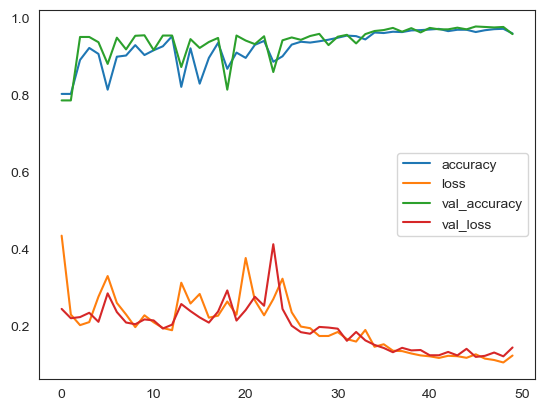

In [112]:
loss_df_bilstm_1 = pd.DataFrame(bilstm_history_1.history)
loss_df_bilstm_1.plot()

In [113]:
pred_bilstm_1 = (BILSTM_1.predict(X_test)>0.5).astype(int)
print(classification_report(y_test,pred_bilstm_1))

108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      2756
           1       0.81      0.99      0.89       694

    accuracy                           0.95      3450
   macro avg       0.91      0.97      0.93      3450
weighted avg       0.96      0.95      0.95      3450



In [114]:
#Bilstm with oversampled data
BILSTM_2 = create_BILSTM()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_1 (Bidirectional) │ (None, 256)            │       133,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_50 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_84 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 177,065 (691.66 KB)

 Trainable params: 177,065 (691.66 KB)

 Non-trainable params: 0 (0.00 B)

In [115]:
bilstm_history_2 = BILSTM_2.fit(X_train_rand,y_train_rand,
          validation_data=(X_val_rand,y_val_rand),
          epochs=50,batch_size=128)

Epoch 1/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 16s 146ms/step - accuracy: 0.5947 - loss: 0.6393 - val_accuracy: 0.8665 - val_loss: 0.5126
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - accuracy: 0.8603 - loss: 0.4929 - val_accuracy: 0.9313 - val_loss: 0.4023
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 13s 161ms/step - accuracy: 0.9261 - loss: 0.3979 - val_accuracy: 0.9375 - val_loss: 0.3713
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 137ms/step - accuracy: 0.9235 - loss: 0.3855 - val_accuracy: 0.9499 - val_loss: 0.3339
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 136ms/step - accuracy: 0.9373 - loss: 0.3621 - val_accuracy: 0.9546 - val_loss: 0.3203
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 134ms/step - accuracy: 0.9608 - loss: 0.3196 - val_accuracy: 0.9693 - val_loss: 0.2859
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 12s 147ms/step - accuracy: 0.9630 - loss: 0.2990 - val_accuracy: 0.9631 - val_loss: 0.2823
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 138ms/step - accuracy: 0.9627 - loss: 0.2879 - val_accu

In [117]:
pred_bilstm_2 = (BILSTM_2.predict(X_test_rand)>0.5).astype(int)
print(classification_report(y_test_rand,pred_bilstm_2))

173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2782
           1       1.00      0.90      0.95      2738

    accuracy                           0.95      5520
   macro avg       0.96      0.95      0.95      5520
weighted avg       0.96      0.95      0.95      5520



### BIGRU with oversampled

In [118]:
from tensorflow.keras.layers import GRU

In [119]:
def create_BIGRU():
    #define model
    model = Sequential()
    #Input Layer
    model.add(Input(shape=(X_train.shape[1],1)))

    model.add(Bidirectional(GRU(units=128)))
    #Dense layer 1
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.2))
    #Dense layer 2
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #layer 3
    model.add(Dense(32,activation='relu'))
    model.add(Dropout(0.2))
    #layer 4
    model.add(Dense(16,activation='relu'))
    model.add(Dropout(0.2))
    #layer 5
    model.add(Dense(8,activation='relu'))
    model.add(Dropout(0.2))
    #layer 6
    model.add(Dense(4,activation='relu'))
    #layer 7
    model.add(Dense(2,activation='relu'))
    #output layer
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    
    model.summary()
    return model
    

In [121]:
GRU_model = create_BIGRU()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_2 (Bidirectional) │ (None, 256)            │       100,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_52 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_53 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_54 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_55 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_56 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_90 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_91 (Dense)                │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_92 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 144,553 (564.66 KB)

 Trainable params: 144,553 (564.66 KB)

 Non-trainable params: 0 (0.00 B)

In [122]:
history_gru = GRU_model.fit(X_train_rand,y_train_rand,
          validation_data=(X_val_rand,y_val_rand),
          epochs=50,batch_size=128)

Epoch 1/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 15s 152ms/step - accuracy: 0.6371 - loss: 0.6064 - val_accuracy: 0.9402 - val_loss: 0.4019
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 134ms/step - accuracy: 0.9124 - loss: 0.4242 - val_accuracy: 0.9293 - val_loss: 0.3920
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 12s 143ms/step - accuracy: 0.9136 - loss: 0.4067 - val_accuracy: 0.9352 - val_loss: 0.3726
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 139ms/step - accuracy: 0.9242 - loss: 0.3853 - val_accuracy: 0.9259 - val_loss: 0.3600
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 12s 143ms/step - accuracy: 0.9312 - loss: 0.3624 - val_accuracy: 0.9577 - val_loss: 0.3249
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 12s 146ms/step - accuracy: 0.9390 - loss: 0.3506 - val_accuracy: 0.9639 - val_loss: 0.2942
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 141ms/step - accuracy: 0.9614 - loss: 0.3036 - val_accuracy: 0.9585 - val_loss: 0.2854
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 140ms/step - accuracy: 0.9600 - loss: 0.2910 - val_accu

<Axes: >

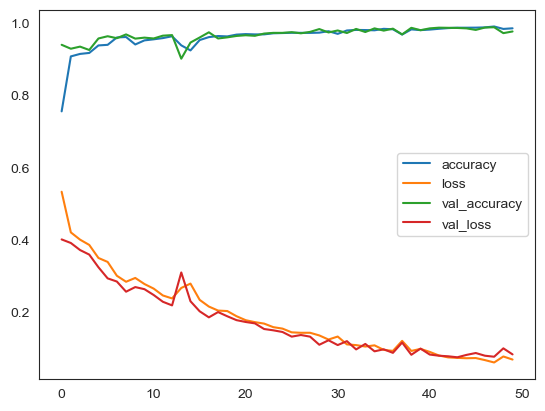

In [124]:
loss_gru = pd.DataFrame(history_gru.history)
loss_gru.plot()

In [125]:
pred_bigru = (GRU_model.predict(X_test_rand)>0.5).astype(int)
print(classification_report(y_test_rand,pred_bigru))

173/173 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2782
           1       0.98      0.98      0.98      2738

    accuracy                           0.98      5520
   macro avg       0.98      0.98      0.98      5520
weighted avg       0.98      0.98      0.98      5520



### Convolution model

In [126]:
from tensorflow.keras.layers import Conv1D,BatchNormalization,MaxPooling1D,Flatten

In [129]:
def create_CNN():
    #define model
    model = Sequential()
    #input
    model.add(Input(shape=(X_train.shape[1],1)))
    #Conv1d
    model.add(Conv1D(filters=32,kernel_size=(6),activation='relu'))
    #Batchnorm
    model.add(BatchNormalization())
    #Maxpool
    model.add(MaxPooling1D(2,padding='same'))
    #conv1d 2
    model.add(Conv1D(filters=32,kernel_size=(6),activation='relu'))
    #Batchnorm
    model.add(BatchNormalization())
    #Maxpool
    model.add(MaxPooling1D(2,padding='same'))
    #Flatten
    model.add(Flatten())
    #Dense
    model.add(Dense(32,activation='relu'))
    model.add(Dropout(0.2))
    #layer 2
    model.add(Dense(16,activation='relu'))
    model.add(Dropout(0.2))
    #layer 3
    model.add(Dense(8,activation='relu'))
    #layer 4
    model.add(Dense(4,activation='relu'))
    #layer 5
    model.add(Dense(2,activation='relu'))
    #output
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    model.summary()
    return model
    

In [130]:
cnn_model = create_CNN()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 173, 32)        │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 173, 32)        │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 87, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 82, 32)         │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 82, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 41, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1312)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_93 (Dense)                │ (None, 32)             │        42,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_57 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_94 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_58 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_96 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,385 (192.91 KB)

 Trainable params: 49,257 (192.41 KB)

 Non-trainable params: 128 (512.00 B)

In [131]:
history_cnn = cnn_model.fit(X_train_rand,y_train_rand,
          validation_data=(X_val_rand,y_val_rand),
          epochs=50,batch_size=128)

Epoch 1/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.7039 - loss: 0.4806 - val_accuracy: 0.7558 - val_loss: 0.5959
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9484 - loss: 0.1509 - val_accuracy: 0.9422 - val_loss: 0.3329
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9705 - loss: 0.0893 - val_accuracy: 0.8595 - val_loss: 0.3110
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9742 - loss: 0.0747 - val_accuracy: 0.8602 - val_loss: 0.2115
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9784 - loss: 0.0698 - val_accuracy: 0.9154 - val_loss: 0.1644
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9817 - loss: 0.0501 - val_accuracy: 0.9018 - val_loss: 0.2610
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9817 - loss: 0.0556 - val_accuracy: 0.9387 - val_loss: 0.1659
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9864 - loss: 0.0365 - val_accuracy: 0.9759 - v

<Axes: >

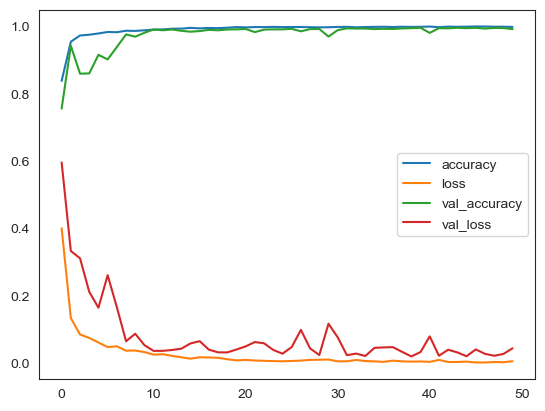

In [132]:
loss_cnn = pd.DataFrame(history_cnn.history)
loss_cnn.plot()

In [133]:
pred_cnn = (cnn_model.predict(X_test_rand)>0.5).astype(int)
print(classification_report(y_test_rand,pred_cnn))

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2782
           1       0.98      1.00      0.99      2738

    accuracy                           0.99      5520
   macro avg       0.99      0.99      0.99      5520
weighted avg       0.99      0.99      0.99      5520

